# MLP Round 1

- 🙏 Please do not do this in production run.

In [165]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [166]:
df = pd.read_excel("data.xlsx", index_col="exp")
_X = df.iloc[:, :-3].values
_Y = df.iloc[:, -3:].values
print(_X.shape)
print(_Y.shape)


_X_train, _X_test, _Y_train, _Y_test = train_test_split(
    _X, _Y, test_size=0.3, random_state=0
)
print(_X_train.shape)
print(_X_test.shape)
print(_Y_train.shape)
print(_Y_test.shape)


scX = StandardScaler()
X_train = scX.fit_transform(_X_train)
X_test = scX.transform(_X_test)

scY = StandardScaler()
Y_train = scY.fit_transform(_Y_train)
Y_test = scY.transform(_Y_test)

(100, 47)
(100, 3)
(70, 47)
(30, 47)
(70, 3)
(30, 3)


In [ ]:
X_train_pt = torch.from_numpy(X_train).float()
X_test_pt = torch.from_numpy(X_test).float()
Y_train_pt = torch.from_numpy(Y_train).float()
Y_test_pt = torch.from_numpy(Y_test).float()

In [168]:
# Define the model
num_features = _X.shape[1]
num_outputs = _Y.shape[1]


class MyModel(nn.Module):
    def __init__(self, num_features, num_outputs):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(num_features, 24)
        self.fc2 = nn.Linear(24, 12)
        self.fc3 = nn.Linear(12, 6)
        self.fc4 = nn.Linear(6, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x


model = MyModel(num_features, num_outputs)

Text(0.5, 1.0, 'Final Loss = 0.026736903935670853')

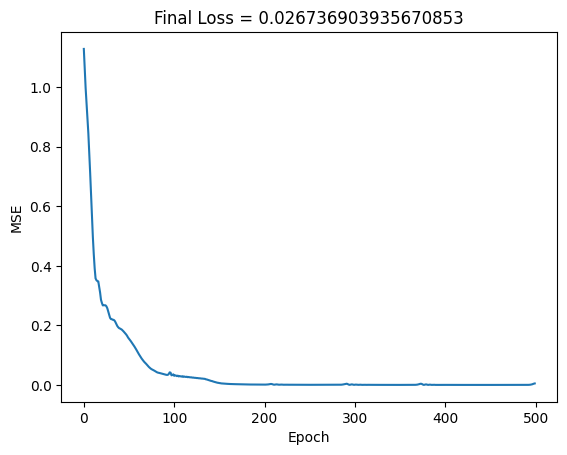

In [ ]:
n_epochs = 500  # number of epochs to run

optimizer = torch.optim.Adam(
    model.parameters(), lr=0.01
)  # Adam optimizer with learning rate 0.01
loss_fn = nn.MSELoss()  # mean square error loss function, good for regression tasks

loss_arr = []
for epoch in range(n_epochs):
    # Training Phase
    model.train()  # set model to training mode
    optimizer.zero_grad()  # reset the gradients before backward pass
    Y_pred = model(X_train_pt)  # forward pass - get predictions for training data
    loss = loss_fn(
        Y_pred, Y_train_pt
    )  # compute MSE loss between predictions and labels

    # Backward pass
    loss.backward()  # compute gradients

    # Update weights
    optimizer.step()  # update the weights

    epoch_train_loss = loss.item()  # extract numerical loss value
    loss_arr.append(epoch_train_loss)  # record loss for this epoch

# Evaluation / Test phase (no grad needed)
with torch.no_grad():
    test_pred = model(X_test_pt)  # get predictions on test set
    final_loss = loss_fn(test_pred, Y_test_pt)  # compute final test loss

# Visualization
ax = sns.lineplot(loss_arr)  # plot loss over epochs using seaborn
ax.set_xlabel("Epoch")
ax.set_ylabel("MSE")
ax.set_title(f"Final Loss = {final_loss}")